<a href="https://colab.research.google.com/github/kurt980/Basketball_Analytics/blob/main/Basketball_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basketball Data Analysis**

## I. Introduction

Traditionally in the sports world, it is very hard to conceptualize what happens on the field with numbers.
In recent years, with the development of precise tracking equipment, people are able to collect tons of
data for analysis. With sophisticated models, data are blended into the basic decision making process
for coaches and managers. As people gain more interest in quantifying the process of sports, there have
been many proposed algorithms that focus on different aspects of the games. This study will dedicate to
exploring the logic and effectiveness of these methods

## II. Motivation

There are many kinds of data one can collect in a sports game. Data is used for predicting outcome and
can achieve 70% accuracy in basketball games. It is lucrative enough for bettors to make some money
out of it. On the other hand, it is also used for player development and analysis. Coaches and managers
attempt to use it to design strategy, building rosters and train their players. Important questions include:
How is the team doing? How to allocate each player’s talent? Who would be a good fit, and who is a
bad fit for the team? I would like to dive in this industry and discuss the current situation and future
expectations.

## III. Literature Review

Sports data has been widely used to demonstrate the functionalities of traditional models like regression.
It also helps with the invention of many important advanced metrics that are widely used in different
kinds of sports like ”effective field goal”, ”four factors” in basketball. Recently with the rise of machine
learning, predicting outcomes has been one of the main focuses of studies on sports analytics. Ozkan
(2020) proposed in his paper a model using modified neural networks that is able to reach 90% accuracy
in predicting basketball games. Thoughts have also been put into studying the nature of sport games.
Halliday (2019) studied the non-linear models that are potentially a better representation of the real
events in a football game, rather than linear ones. Papers have been published to dive into the possible
Poisson distribution of field goals in soccer and hence modelling it with more confidence. Mays(2022)
proposed a method that utilizes quantile regression and is able to predict well with the basic collectable
statistics in basketball.


## IV. Data

The data used for experiments in this discussion consists of multiple different types. It is rather complicated to explain how each of them is calculated but it can be categorized into several main parts: raw
data, advanced data and performance metrics.
In this study, the data used in simulation experiments is all basketball data for simplicity. In fact, many
types of data in basketball are generalizable to other sports.


### **Pre-processing**

#### **Import Packages**

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### **Using nba_api**

In [ ]:
!pip install nba_api

In [ ]:
from nba_api.stats.endpoints import playercareerstats

### **Load Data**

####**Reading game log data from local files**

Raw Box Score

In [ ]:
# initialize team box score data
df = pd.read_csv('/content/sample_data/box_score.csv')
df = df.dropna(axis=0)

In [ ]:
# 
df_1 = df.loc[:,~df.columns.isin(['GAME_DATE', 'MATCH_UP', 'TEAM', 'MIN', 'REB', 'PD','FTA','FGA','TPA'])]
df_1['W_L'] = pd.get_dummies(df_1['W_L'])['W']
x_1 = df_1.loc[:,df_1.columns != 'W_L'].reset_index(drop = True) 
x_1norm = (x_1 - x_1.mean()) / (x_1.max() - x_1.min())
x_1[x_1norm.columns] = x_1norm
y_1 = df_1.loc[:,df_1.columns == 'W_L'].reset_index(drop = True)
y_1 = y_1['W_L']

<ipython-input-21-a4984a49bff6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['W_L'] = pd.get_dummies(df_1['W_L'])['W']


In [ ]:
df.head(5)

Advanced Box Score

In [ ]:
dfa = pd.read_csv('/content/sample_data/advanced_box_score_2023.csv', encoding='latin-1')

In [ ]:
dfa['W/L'] = pd.get_dummies(dfa['W/L'])['W']
dfa_1 = dfa.loc[:,~dfa.columns.isin(['TEAM','MATCH_UP','GAME_DATE','MIN','OFFRTG','DEFRTG','NETRTG','PIE'])]
dfa_1 = dfa_1.dropna()

xa_1 = dfa_1.loc[:,dfa_1.columns != 'W/L'].reset_index(drop = True) 
xa_n = (xa_1 - xa_1.mean()) / (xa_1.max() - xa_1.min())
xa_1[xa_n.columns] = xa_n
ya_1 = dfa_1.loc[:,dfa_1.columns == 'W/L'].reset_index(drop = True)
ya_1 = ya_1['W/L']

In [ ]:
dfa.head(5)

Four Factors Data

In [ ]:
df_four = pd.read_csv('/content/sample_data/four_factors.csv')
df_four = df_four.dropna()
df_four = df_four.rename(columns = {'DATE':'GAME_DATE'})

In [ ]:
df4 = df_four.loc[:,~df_four.columns.isin(['TEAM','MATCH','GAME','GAME_DATE','MIN'])]
df4.columns = ['HOME',	'W_L',	'EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB']
df4['W_L'] = pd.get_dummies(df4['W_L'])['W']
df4['HOME'] = pd.get_dummies(df4['HOME'])['vs.']

In [ ]:
df4.head(5)

,HOME,W_L,EFG,FTR,TOV,OREB,OPPEFG,OPPFTR,OPPTOV,OPPOREB
0,0,0,41.2,0.282,11.8,24.1,54.8,0.289,14.9,33.3
1,0,0,46.6,0.402,14.0,23.5,50.0,0.226,10.2,37.1
2,1,1,51.6,0.290,21.7,44.9,59.9,0.296,18.1,15.6
3,1,1,46.3,0.326,12.6,33.3,48.9,0.274,16.3,37.1
4,0,0,48.9,0.274,16.3,37.1,46.3,0.326,12.6,33.3


## V. Raw Data and Usage

Raw data is considered the data that is easily recorded and calculated by manual labor. It is usually la\belled ”Box Score”. This category includes numbers like field goal percentage(basketball), yards(Football);

Taking basketball as an example, if we run a logistic regression model with these statistics and the response being win/loss, we can get an 80% accuracy in predicting the outcome. From a more practical
point of view, we want to identify influential factors and how they relate to the team’s performance. It
is useful for teams to decide how they should adjust their rosters and strategy to play better.

### 5.1 Simulation Study

An overview of the data we use for this category is as follows:

#### **Analysis on Raw Box Score**

**Logistic Regression**

In [ ]:
# split train and test by 4:1
x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size=0.2)
# x_train['Intercept'], x_test['Intercept'] = 1, 1 

In [ ]:
log_reg = sm.Logit(y_train, x_train).fit()

In [ ]:
accuracy_score(y_test, list(map(round, log_reg.predict(x_test))))

In [ ]:
# run 10 batches

In [ ]:
print(log_reg.summary())

A logistic regression is run on some basic statistics collected by the NBA. About half the metrics are not
significant, which is reasonable because many of them are ambiguous intuitively: more points scored does
not mean the team is good, because it could have a bad defense. However, metrics like FG(measures the
accuracy of shots) show significant coefficients, which shows us that we could potentially get better data
by digging into these data.

However, running such model may face low accuracy, hence failing to detect the true effects. As shown
in figure 2, the win and loss data points have a fairly large overlapping. The visualization comes from
taking the first 2 components from the PCA results of multiple basic basketball statistics for 200 games,
and we can see much overlapping.

**Cluster over Win/Loss from Raw Box Score**

In [ ]:
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(x_1))

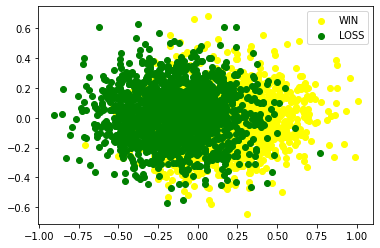

In [ ]:
# Visualize PCA results
plt.scatter(transformed[y_1==1][0], transformed[y_1==1][1], label='WIN', c='yellow')
plt.scatter(transformed[y_1==0][0], transformed[y_1==0][1], label='LOSS', c='green')

plt.legend()
plt.show()

Here a 2nd degree polynomial is plugged into the logistic regression model. We now see a higher pseudo
R2
. Which potentially signalize the non-linearity behind the data. However, this model is not as accurate,
which is concluded in later comparisons

**Polynomial Logistic**

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = True)
x_poly = poly.fit_transform(x_train.loc[:,x_train.columns != 'Intercept'])
x_poly.shape

(2569, 120)

In [ ]:
log_reg_poly = sm.Logit(y_train, x_poly).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.8/dist-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [ ]:
print(log_reg_poly.summary())

In [ ]:
accuracy_score(y_test, list(map(round, log_reg_poly.predict(poly.fit_transform(x_test.loc[:,x_train.columns != 'Intercept'])))))

0.8429237947122862

In [ ]:
# run 10 batches

In order to get a better representation of the true results, we need to have better data and better measurements, which are talked about in Section 6 and Section 7

## VI. Advanced Data and Advantage

Advanced data is considered to be hard to collect manually and often requires carefully reviewing the
replay and recording tapes. Some of the data needs to be tracked by computer. The formulas involved
are generally more complicated and requires statistical inference for justification. Such data includes
efficient field goal percentage in basketball, which is computed by:

$$(FieldGoal + 0.5 × 3P ointF ielGoal)/FieldGoalAttempt$$

in order to balance the effectiveness in scoring by 2 point and 3 point shots

###**Analysis on Advanced Statistics**

**Advanced Statistics**

In [ ]:
# split train and test by 4:1
xa_train, xa_test, ya_train, ya_test = train_test_split(xa_1,ya_1,test_size=0.2)

In [ ]:
xa_train['Intercept'] = 1
xa_test['Intercept'] = 1

**Logistic Regression**

In [ ]:
log_reg_a = sm.Logit(ya_train, xa_train.astype(float)).fit()
print(log_reg_a.summary())

In [ ]:
accuracy_score(ya_test, list(map(round, log_reg_a.predict(xa_test))))

0.8118195956454122

In [ ]:
# run 10 batches


### 6.1 Four Factors

In basketball, a measure created by Dean Oliver is called ”Four Factors”. It utilizes some of the advanced
statistics mentioned above. The four factors are to score efficiently, protect the basketball on offense,
grab as many rebounds as possible, and get to the foul line as often as possible. Each of these elements
are closely related to the termination of a possession for a team. The widely-used measurements for these
4 factors are Effective Field Goal Percentage, Turnover Percentage, Offensive Rebound Percentage and
Free Throw Rate; to include both the influence on offense and defense, the opponent’s four factors are
also included in the data

### 6.2 Simulation Study

The simulation study is about predicting win/loss, in order to test how accurate the data predicts the game results. We can justify the effectiveness of the ”four factor” metric and compare them with raw data.

Logistic Regression results for Four Factors:

The four factor model has a significantly better performance compared with raw data. The ’Home court’
and intercept are both non-significant so the four factors have indeed a very influential impact. A thing
to notice is that the coefficients for the same metric for home/away teams have similar magnitudes but
opposite signs. Comparatively, we can see the efficient field goal percentage has the highest impact on
the log odds of winning with a coefficient of 41, while offensive rebounding rate has coefficient of 16; Free
throw rate has a coefficient of 7.6. And turnover rate has a negative impact, with coefficient of -18.

**Four Factors**

In [ ]:
x4 = df4.loc[:,df4.columns != 'W_L'].reset_index(drop = True) 
x4_n = (x4 - x4.mean()) / (x4.max() - x4.min())
x4[x4_n.columns] = x4_n

y4 = df4.loc[:,df4.columns == 'W_L'].reset_index(drop = True)
# split train and test by 4:1
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.2)

**Logistic Regression**

In [ ]:
log_reg_4_1 = smf.logit(formula="W_L ~ EFG	+ FTR + TOV	+ OREB + OPPEFG + OPPFTR + OPPTOV + OPPOREB + C(HOME)", data=pd.concat([y4_train,x4_train], axis=1)).fit()
print(log_reg_4_1.summary())

In [ ]:
accuracy_score(y4_train, list(map(round, log_reg_4_1.predict(x4_train))))

0.9430577223088924

In [ ]:
# Cross-validation
mean4 = []
for i in range(10):
  batch = df4.sample(1000)

  x4b = batch.loc[:,batch.columns != 'W_L'].reset_index(drop = True) 
  x4_nb = (x4b - x4b.mean()) / (x4b.max() - x4b.min())
  x4b[x4_nb.columns] = x4_nb

  y4b = batch.loc[:,batch.columns == 'W_L'].reset_index(drop = True)
  # split train and test by 4:1
  x4b_train, x4b_test, y4b_train, y4b_test = train_test_split(x4b,y4b,test_size=0.2)

  log_reg_4_b = smf.logit(formula="W_L ~ EFG	+ FTR + TOV	+ OREB + OPPEFG + OPPFTR + OPPTOV + OPPOREB + C(HOME)", data=pd.concat([y4b_train,x4b_train], axis=1)).fit()
  
  mean4.append(accuracy_score(y4b_train, list(map(round, log_reg_4_b.predict(x4b_train)))))


In [ ]:
mean4

3206

### 6.3 Comparison between Section 5 and 6

To highlight the superiority of advanced data, the table below is a comparison between previous models.

The second order polynomial has a very high variance compared with other models, likely over-fitting.
The four-factor model has low variance and is able to reach high accuracy

### 6.4 Quantile Regression to Estimate Winning Probability
In a paper by Mays(2022), a novel model involving quantile regression is introduced. Mays proposed that,
similar to logistic regression, we can use quantile regression instead to estimate the probility of winning
using statistics:



##**Quantile Regression**

In [ ]:
# fit the model
model = smf.quantreg('Emission ~ Distance',
                     df).fit(q=0.7)
 
# view model summary


In [ ]:
df_p0

,TEAM,MATCH_UP,GAME_DATE,W_L,MIN,PTS,FGM,FGA,FG,TPM,...,DREB,REB,AST,TOV,STL,BLK,PF,PD,AWAYPTS,PWP
0,LAC,LAC @ MIA,12/8/2022,L,48,110,37,80,46.3,17,...,36,43,24,16,3,3,16,-5,115,0.324437
1,SAS,SAS vs. HOU,12/8/2022,W,48,118,46,83,55.4,13,...,31,38,25,17,5,7,19,9,109,0.787355
2,POR,POR vs. DEN,12/8/2022,L,48,120,44,91,48.4,16,...,25,38,30,13,10,3,20,-1,121,0.465821
3,DEN,DEN @ POR,12/8/2022,W,48,121,47,91,51.6,12,...,32,48,28,16,6,5,16,1,120,0.534179
4,HOU,HOU @ SAS,12/8/2022,L,48,109,44,98,44.9,10,...,26,42,23,14,3,4,19,-9,118,0.212645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,SAS,SAS @ DET,1/1/2022,L,53,116,42,102,41.2,12,...,35,48,30,17,8,3,27,-1,117,0.464651
3208,UTA,UTA vs. GSW,1/1/2022,L,48,116,40,92,43.5,14,...,30,45,19,13,7,0,21,-7,123,0.275518
3209,CHI,CHI @ WAS,1/1/2022,W,48,120,41,84,48.8,17,...,38,44,17,15,4,4,24,1,119,0.534464
3210,HOU,HOU vs. DEN,1/1/2022,L,48,111,37,85,43.5,16,...,23,36,20,18,10,4,24,-13,124,0.138549


## VII. Team Performance Metrics
So far, our main focus of response variable is on Win/Loss, which can be explained well with the ”Four
Factors” metrics and fairly well with basic and advanced statistics. While many kinds of raw data and
advanced data can be fairly informative, the need for much more generalizable performance metrics is
on the rise. These metrics are sometimes calculated from raw/advanced data, and sometimes measured
by hand. Compared with predicting 0/1 responses, it is easier to correlate the statistics with numerical
measures, and the results are usually more informative and robust for studies.

The key question for this section is: Can we measure the performance of a team and learn what contributes to most of it? We can use many different metrics to measure the bigger picture.

## 7.1 Points Differential

Points differential is calculated by the points scored by the home team subtracted by the points scored
by the visiting team. Thus it can not equal to 0. If we randomly sample some data, it would look like this:

**Use Quantile Regression on Points Differential**

In [ ]:
df_p0 = pd.read_csv('/content/sample_data/box_score.csv')
df_p0 = df_p0.dropna(axis=0)
df_p0 = df_p0.rename(columns = {'DATE':'GAME_DATE'})
df_p = df_p0.loc[:,~df_p0.columns.isin(['GAME_DATE', 'MATCH_UP', 'TEAM', 'MIN', 'REB', 'W_L'])]
df_p = df_p[df_p['PD'] > 0]

x_p = df_p.loc[:,df_p.columns != 'PD'].reset_index(drop = True) 
x_pnorm = (x_p - x_p.mean()) / (x_p.max() - x_p.min())
x_p[x_pnorm.columns] = x_pnorm
y_p = df_p.loc[:,df_p.columns == 'PD'].reset_index(drop = True)
df_p[x_pnorm.columns] = x_pnorm

In [ ]:
len(df_p) #.head(5)

1606

In [ ]:
plt.hist(df_p['PD'], 100)

Point differential is approximately a Long-Tail Distribution, but the eaxt distribution to be used is unknown.

Reference:
https://statmodeling.stat.columbia.edu/2014/02/25/differential/

We observe that points differential follows a bimodal distribution that is symmetric to 0. If a complete
data with all games is included, then it is perfectly symmetric and contains redundant information(the
data for both teams in a game would be included). If we take the only one side of it, then it roughly
follows a poisson distribution. We can use non-linear or quantile regression to measure the relationship
between points differential and other factors.

### 7.2 Simulation Study

Since the distribution is bimodal, regressing with respect to the mean would be meaningless. Here we
use quantile regression and the raw data mentioned in Section 5 and four factors in Section 6.

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.95)
 
# view model summary
print(q_pd.summary())

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.75)
 
# view model summary
print(q_pd.summary())

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.25)
 
# view model summary
print(q_pd.summary())

In [ ]:
# fit the model
q_pd = smf.quantreg('PD ~ PTS+FGM+FG+TP+FTM+FT+OREB+DREB+AST+TOV+STL+BLK+PF',
                     df_p).fit(q=0.1)
 
# view model summary
print(q_pd.summary())

**Conclusion**
This is almost saying our model is useless and a linear regression should be used instead. Therefore in
the chapters below, we will stick to linear regression.
- Using quantile regression we do not observe any useful information. The coefficients are almost the same for each quantile, I have no idea.

**Join 4-factors with box score**

In [ ]:
# Join four factors with box score
df4all = pd.merge(df, df_four, on = ['TEAM', 'GAME_DATE'])
df4pd = df4all[['EFG%','FTR','TOV%','OREB%','OPPEFG%','OPPFTR','OPPTOV%','OPPOREB%','PD']]
df4pd.columns = ['EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PD']
df4pd = df4pd[df4pd['PD']>0]

In [ ]:
df4pd

In [ ]:
x4pd = df4pd[['EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB']]
x4n = (x4pd - x4pd.mean()) / (x4pd.max() - x4pd.min())
df4pd[x4n.columns] = x4n

In [ ]:
# fit the model
q_4pd = smf.quantreg('PD ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     df4pd).fit(q=0.05)
 
# view model summary
print(q_4pd.summary().tables[1])

In [ ]:
q_4pd.summary().tables[1]

In [ ]:
# fit the model
q_4pd = smf.quantreg('PD ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     df4pd).fit(q=0.9)
 
# view model summary
q_4pd.summary().tables[1]

In [ ]:
# fit the model
q_4ols = smf.ols('PD ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     df4pd).fit()
 
# view model summary
print(q_4ols.summary())

**Use Linear Regression to predict Winning Percentage**

In [ ]:
df4all = pd.merge(df,df_four, on = ['TEAM', 'GAME_DATE'])
df4all = df4all[['TEAM','EFG%','FTR','TOV%','OREB%','OPPEFG%','OPPFTR','OPPTOV%','OPPOREB%','PD']]
df4all.columns = ['TEAM','EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PD']
# df4all = df4all[df4all['PD']>0]
dfwp = pd.concat([df4all.groupby('TEAM').mean().iloc[:,:-1], df4all.groupby('TEAM').mean()['PD']], axis=1).reset_index(drop=True)
dfwp['WP'] = (dfwp['PD'] * 2.7 + 41) / 82

x = dfwp.iloc[:,:-1]
xn = (x - x.mean()) / (x.max() - x.min())
dfwp[xn.columns] = xn

In [ ]:
dfwp

In [ ]:
# fit the model
ols_wp = smf.ols('WP ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     dfwp).fit()

# view model summary
print(ols_wp.summary())

### 7.3 Winning Percentage

The actually winning percentage is calculated by

$$\frac{NumberOfGamesWon}{NumberOfGamesPlayed}$$

It is a strong indicator of how well the team played. In analytical tasks, people want to project this
ratio by analyzing current data. Winning percentage usually has 2 types: projected winning percentage
and Pythagorean winning percentage. Projected Winning Percentage is a formula that simply uses a
team’s net overall point differential rather than points scored and point allowed. Each point differential
translates to 2.7 wins over the course of the season. In NBA, this ratio is calculated from the total number
of games in a regular season: 82 games.

$$P rojectedW inningP ercentage(NBA basketball) = \frac{P ointsDifferential × 2.7) + 41}{82}$$

Pythagorean Winning Percentage is a method that gives an expected winning percentage using the ratio
of a team’s wins and losses are related to the number of points scored and allowed. It was first created
by Baseball analyst Bill James from the intuition that a team’s expected wins is observed from the total
runs scored and total runs allowed. The theoretical explanation is later given by mathematician Steven
J. Miller, which states that if each run follows a Weibull distribution and the runs scored and allowed
per game are statistically independent, then the Pythagorean Winning Percentage gives the probability
of winning. [Miller (2007). ”A Derivation of the Pythagorean Won-Loss Formula in Baseball”. Chance.
20: 40–48. arXiv:math/0509698. Bibcode:2005math......9698M.]

$$P ythagoreanW inningP ercentage(basketball) = \frac{P ointsScored16.5}{P ointsScored16.5 + P ointsAllowed16.5}$$

The power of 16.5 specifically for basketball is calculated by basketball statistician John Hollinger. NBA
executive Daryl Morey has his version where the power is 13.91. In other sports, different powers are
used. For example, the power is 2.37 for the calculation of American Football.

Competitive Balance Ratio (CBR) is a metric that reflects team-specific variation in winning percentage
over time and league-specific variation. Variation in the CBR explains also explains variation in the
annual attendance in professional sports more significantly than other alternatives measures do. Besides
attendance numbers, we also think NBA’s TV ratings slump has to do with a low competitive balance
ratio in the recent seasons.


### 7.4 Simulation Study

**Projected Winning Percentage**

From the results from running an linear regression on projected winning percentage with the predictors
being the ”four factors”, we observe a highly reliable model with R2 of 0.99. The mean winning percentage is expected to be 0.5. We see a relatively stronger signal for TOV(turnover) percentage for both
home team and opposing team.

*DATA MISSING*

**Pythagorean Winning Percentage**

In [ ]:
df_p0['AWAYPTS'] = df_p0['PTS'] - df_p0['PD']
df4all = pd.merge(df_p0,df40, on = ['TEAM', 'GAME_DATE'])
df4all = df4all[['TEAM','EFG%','FTR','TOV%','OREB%','OPPEFG%','OPPFTR','OPPTOV%','OPPOREB%','PTS','AWAYPTS']]
df4all.columns = ['TEAM','EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PTS','AWAYPTS']

dfpwp = pd.concat([df4all.groupby('TEAM').mean().iloc[:,:-2], df4all.groupby('TEAM').mean()[['PTS','AWAYPTS']]], axis=1).reset_index(drop=True)

x = dfpwp.iloc[:,:-2]
xn = (x - x.mean()) / (x.max() - x.min())
dfpwp[xn.columns] = xn

dfpwp['PWP'] = (dfpwp['PTS']**16.5 / (dfpwp['PTS']**16.5 + dfpwp['AWAYPTS']**16.5))
dfpwp = dfpwp[['EFG',	'FTR',	'TOV',	'OREB',	'OPPEFG',	'OPPFTR',	'OPPTOV',	'OPPOREB', 'PWP']]

In [ ]:
dfpwp

In [ ]:
# fit the model
ols_pwp = smf.ols('PWP ~ EFG+FTR+TOV+OREB+OPPEFG+OPPFTR+OPPTOV+OPPOREB',
                     dfpwp).fit()
 
# view model summary
print(ols_pwp.summary())

We observe that using these numeric measures could yield very confident regression models, each with
R2 over 0.9. We also observe that the coefficients are close to logistic regression results for four factors
in terms of the relative magnitude, like EFG being the most impactful variable. Hence we can say that
the coefficients correspond to the realistic impact from these factors.

## VIII. Non-fitting Methods

### 8.1 Regression Tree
Non-parametric models do not assume underlying distributions. It is beneficial in that they are more
practical but they are hard to interpret.Below is the results from running regression trees on raw data/advanced data/four factors;
We run CART on all data sets, where the importance of each variable is plotted. We can see they align mostly with regression results.

**CART**

In [ ]:
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [ ]:
importance = clft.feature_importances_

In [ ]:
importance

array([0.0472305 , 0.09787169, 0.05204726, 0.07281392, 0.08684603,
       0.16113569, 0.06750995, 0.060391  , 0.29247631, 0.06167764])

In [ ]:
xa_train.columns

Index(['AST%', 'AST/TO', 'ASTRAT', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%',
       'TS%', 'PACE'],
      dtype='object')

In [ ]:
accuracy_score(y_test, list(map(round, clf.predict(x_test))))

0.68

In [ ]:
temp = pd.DataFrame({'Var': ['AST%', 'AST/TO', 'ASTRAT', 'OREB%', 'DREB%', 'REB%', 'TOV%', 'EFG%',
       'TS%', 'PACE'],
       'Importance':[0.0472305 , 0.09787169, 0.05204726, 0.07281392, 0.08684603,
       0.16113569, 0.06750995, 0.060391  , 0.29247631, 0.06167764]})

In [ ]:
tree.plot_tree(clf)

In [ ]:
dfa = pd.read_csv('/content/sample_data/advanced_box_score_2023.csv', encoding='latin-1')
dfa['W/L'] = pd.get_dummies(dfa['W/L'])['W']
dfa_1 = dfa.loc[:,~dfa.columns.isin(['TEAM','MATCH_UP','GAME_DATE','MIN','OFFRTG','DEFRTG','NETRTG','PIE'])]
dfa_1 = dfa_1.dropna()

xa_1 = dfa_1.loc[:,dfa_1.columns != 'W/L'].reset_index(drop = True) 
# xa_n = (xa_1 - xa_1.mean()) / (xa_1.max() - xa_1.min())
# xa_1[xa_n.columns] = xa_n
ya_1 = dfa_1.loc[:,dfa_1.columns == 'W/L'].reset_index(drop = True)
ya_1 = ya_1['W/L']

In [ ]:
clft = tree.DecisionTreeRegressor()
clft = clft.fit(x_train, y_train)

In [ ]:
accuracy_score(y_test, list(map(round, clft.predict(x_test))))

0.705

In [ ]:
clft = tree.DecisionTreeRegressor()
clft = clft.fit(xa_train, ya_train)

In [ ]:
accuracy_score(ya_test, list(map(round, clft.predict(xa_test))))

0.6858475894245724

In [ ]:
clft = tree.DecisionTreeRegressor()
clft = clft.fit(x4_train, y4_train)

In [ ]:
x4_train.columns

Index(['HOME', 'EFG', 'FTR', 'TOV', 'OREB', 'OPPEFG', 'OPPFTR', 'OPPTOV',
       'OPPOREB'],
      dtype='object')

In [ ]:
temp = pd.DataFrame({'Var': ['HOME', 'EFG', 'FTR', 'TOV', 'OREB', 'OPPEFG', 'OPPFTR', 'OPPTOV',
       'OPPOREB'],
       'Importance': [0.00659896, 0.29037141, 0.04570097, 0.08860581, 0.07314298,
       0.30450245, 0.03882786, 0.08862623, 0.06362334]})

In [ ]:
temp

,Var,Importance
0,HOME,0.006599
1,EFG,0.290371
2,FTR,0.045701
3,TOV,0.088606
4,OREB,0.073143
5,OPPEFG,0.304502
6,OPPFTR,0.038828
7,OPPTOV,0.088626
8,OPPOREB,0.063623


In [ ]:
temp = temp.sort_values('Importance')

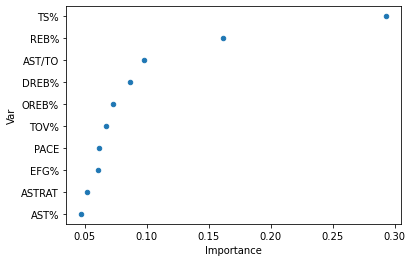

In [ ]:
temp.plot.scatter('Importance', 'Var')

Feature: 0, Score: 0.00660
Feature: 1, Score: 0.29037
Feature: 2, Score: 0.04570
Feature: 3, Score: 0.08861
Feature: 4, Score: 0.07314
Feature: 5, Score: 0.30450
Feature: 6, Score: 0.03883
Feature: 7, Score: 0.08863
Feature: 8, Score: 0.06362


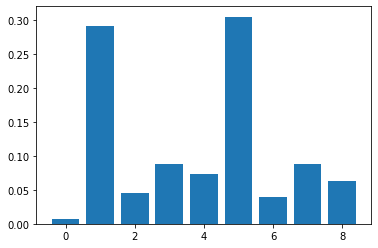

In [ ]:
importance = clft.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
importance.sort()
importance

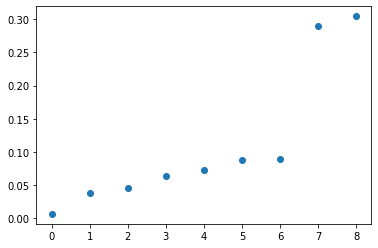

In [ ]:
pyplot.scatter([x for x in range(len(importance))], importance)
pyplot.show()

We found that the influential factors align with the Four-Factors theory by Dean Oliver

In [ ]:
accuracy_score(y4_test, list(map(round, clft.predict(x4_test))))

0.7975077881619937

CART performs poorly compared with logistic regression models.

## IX. Simulation Models
We have discussed linear/non-linear regression models that predict binary/numeric outcomes. The assumptions of these models generally involve descriptive statistics being correlated with the expectation
of some function containing the response. It is also proposed that the game results can be simulated with proper assumptions about the game’s nature

### 9.1 Weibull/Poisson Model

Wu,etc.(2022) argue that the points scored and allowed follow Weibull distributions, which agree with
the discussion by Miller of the Pythagorean Winning Percentage. It is plausible to predict points and
eventually the outcome of games using such assumptions.
It is also tempting to treat basketball field goals as Poisson variables, like the model implemented by Andrade(2022) for football to predict World Cup 2022. However, it is proposed by Mart´ın-Gonz´alez,etc.(2016)
that basketball events does not necessarily follow a poisson distribution. They argued that the result of
the competed basketball games depends on the last minute of the game. This makes the Poisson model
less realistic. But it relieves more assumptions made in logistic regression regarding linearity. Due to
time restriction Weibull/Poisson models are not simulated.
Simulation models usually only focus on the underlying distribution of the game results rather than providing useful information about what contributes to the results of the games. In our examples, none of
the data mentioned in Section 5, 6, and 7 was studied. This simulation strategy is often used by team
and coaches to test their strategy proposal/evaluate their roster changes.


## X. Limitations and Future Work
Since we have discussed the effort to model events in games in Section 9, we can extend these ideas to
simulation of the actual game. Given sufficient data to evaluate the performance of players and teams,
we can simulate each events on the court: player’s movements, defense events, a shot that goes in/misses,
a shot that is blocked, even the ball is stolen by the opponent players. If we are able to accurately depict
these actions, then the final outcome of the games will be realistic. In fact, in man-versus-computer videos
games, the ”enemy” is usually hand-coded by developers, and sometimes high-level AI technique is used
to achieve better performance. The AI in video games obeys the rules of the game, and find its own way to
reach the ”goal”, which is winning. It is a bit similar to sports analytics, right? The AI analyzes the situation, and makes the decision it thinks the most impactful. Hopefully we can tackle this area in the future.


## XI. Conclusion
We discussed different types of data used for analytics, including box score and advanced box score.
We also introduced different measurements for performances, like winning percentage. These statistics
combined to yield promising prediction results by regression models. Given that, we are confident to
point out that four factors accounts for most of the success/failure in a basketball game. Furthermore,
we discussed more advanced algorithms that try to model the game from other perspectives. It is a long
way to study the nature of the events in sports games. It is likely that many events follow very different
distributions, and we can ensemble our understanding of them to create much more informative models